# Prediction using Supervised Machine Learning

## To predict the percentage of a student based on number of study hours. 

In [2]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing dataset

In [3]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

In [4]:
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.shape

(25, 2)

In [7]:
# getting general information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Analyse Dataset

In [8]:
# getting corelation between features
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

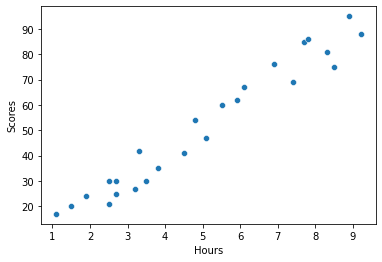

In [9]:
sns.scatterplot(data= df, x= df.Hours, y=df.Scores)

Above plot shows Positive linear trend in data and corelation value is 0.976

## Now we perform Predictive analysis using Linear Regression

#### splitting dataset

In [29]:
x = df.iloc[:,0:1]    #input variable
y = df.iloc[:,1]  #target variable

In [30]:
# splitting our dataset into train and test data to avoid data leakage
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 2)

In [33]:
# importing Linear Regression Model
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression() #created instance of our model

In [35]:
# the x and y variables must be a 2-D Array, otherwise fit() function will through an error. 
lr.fit(x_train, y_train)  # model training

LinearRegression()

In [44]:
# predicting target values for x_test variable
y_pred = lr.predict(x_test).round(decimals=2)

In [45]:
y_pred

array([12.44, 26.36, 20.4 , 92.96, 70.1 ])

### Model Evaluation Using Visualization

Text(0.5, 1.0, 'Hours vs Scores')

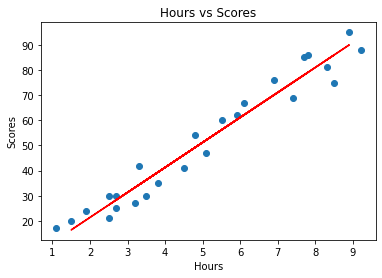

In [76]:
plt.scatter(df['Hours'],df['Scores'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores')

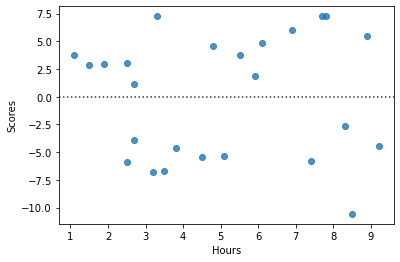

In [69]:
# if residual plot is evenly spreadout around x-axis then linear model is appropriate.
sns.residplot(data= df, x=x, y=y);

### Model Validation

In [47]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

4.876

In [77]:
lr.score(x_train,y_train)

0.9423348138802985

#### predicting score for student who studied for 9.25hours/day

In [52]:
import numpy as np

In [59]:
y_pred_9 = np.array(9.25).reshape(1,1)
lr.predict(y_pred_9)

array([93.45860056])